# TASK 2

# 01 Import analysis and Visualization Libraries

In [3]:
#analysis libraries
import pandas as pd
import numpy as np
import os

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import of Dataframe

## Creating Path

In [6]:
path = r'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/02 Data/Prepared Data'

In [7]:
#checking path
path

'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/02 Data/Prepared Data'

## Import Dataframe

In [9]:
customers_ords_prods = pd.read_pickle(os.path.join(path, 'customers_orders_products.pkl'))

In [10]:
#checking output
customers_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,-44,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,-44,both
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,94,both
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,76,both
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,76,both


In [11]:
#checking shape
customers_ords_prods.shape

(32404859, 32)

In [12]:
customers_ords_prods.dtypes

product_id                  int32
product_name               object
aisle_id                    int16
department_id               int16
prices                    float64
order_id                   object
user_id                    object
order_number                int16
orders_day_of_week          int16
order_hour_of_day           int16
days_without_ordering     float16
add_to_cart_order           int16
reordered                   int16
price_label                object
busiest_days               object
busiest_period_of_day      object
max_order                   int16
loyalty_flag               object
user_mean_price           float64
Spender_habit              object
median_days_no_order      float16
customer_type              object
first_name                 object
surname                    object
gender                     object
state                      object
age                          int8
date_joined                object
number_of_dependants         int8
marital_status

In [13]:
# removal of '_merge' column
customers_ords_prods.drop(columns = ['_merge'], inplace = True)

# 03 Histogram

([<matplotlib.axis.XTick at 0x1f052a360>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

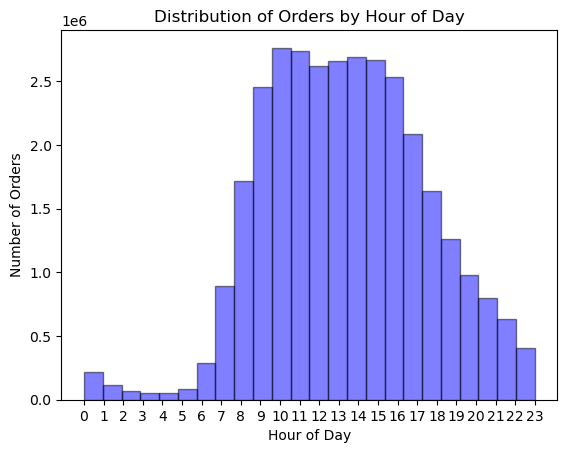

In [15]:
# create histogram of 'order_hour_of_day'
hist = (customers_ords_prods['order_hour_of_day'].plot.hist( bins=24, color='blue', edgecolor='black', alpha=0.5))

# Add title and labels
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')

#Set x-ticks to show each hour
plt.xticks(range(0, 24))

This Histogram shows total number of orders (in millions) that have been placed on each hour of the day throughout all of our data collected. we can clearly see that at 10am is the time most common for customers to order and 3-4am is the least common time to order.

# Export Histogram

## Creating Path for Visualizations

In [19]:
path2 = r'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

In [20]:
#checking path
path2

'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

## Exporting Histogram

In [22]:
hist.figure.savefig(os.path.join(path2, 'hist_order_hour_of_day.png'))

# 04 Bar Chart

(array([0, 1, 2]),
 [Text(0, 0, 'Regular Customer'),
  Text(1, 0, 'Loyal Customer'),
  Text(2, 0, 'New Customer')])

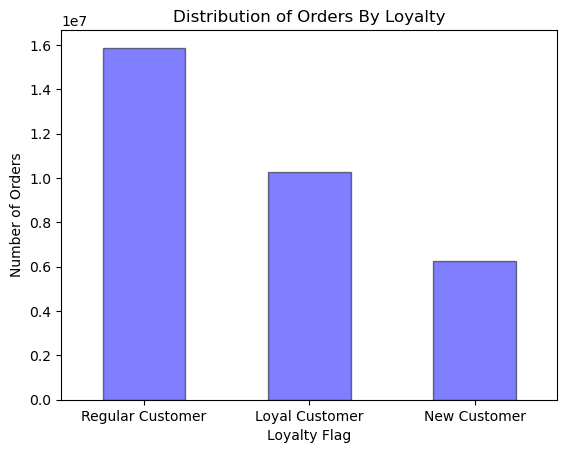

In [24]:
#Create Bar Chart of 'loyalty_flag'
bar = (customers_ords_prods['loyalty_flag'].value_counts().plot.bar(color = 'blue', edgecolor = 'black', alpha = 0.5))

#Creating Labels
plt.title('Distribution of Orders By Loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  

## Export Bar chart

In [26]:
bar.figure.savefig(os.path.join(path2, 'bar_distribution_of_orders_by_loyalty_flag.png'))

# 05 Line Plot

## Creating a 70-30 Sample of dataframe

In [29]:
#Creating random seed
np.random.seed(4)

#Create list of True/False to the test n.random.rand() <=0.8
dev = np.random.rand(len(customers_ords_prods)) <= 0.8

#Creating dataframe to store 80% of sample called big (stores all the true)
big = customers_ords_prods[dev]

#Creating dataframe to store 20% of sample called small (~dev stores all the false)
small = customers_ords_prods[~dev]

In [30]:
#Checking len customers_ords_prods
len(customers_ords_prods)

32404859

In [31]:
#Checking len of big and small = len of customers_ords_prods
len(big) + len(small)

32404859

In [32]:
df = small[['order_hour_of_day', 'prices']]
df2 = big [['order_hour_of_day', 'prices']]

In [33]:
#Checking output
df.head()

,order_hour_of_day,prices
0,11,5.800781
2,21,5.800781
6,14,5.800781
12,13,5.800781
13,12,5.800781


In [34]:
#checking output
df2.head()

,order_hour_of_day,prices
1,17,5.800781
3,13,5.800781
4,17,5.800781
5,7,5.800781
7,10,5.800781


## Creating the Lineplot

([<matplotlib.axis.XTick at 0x1f07094f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

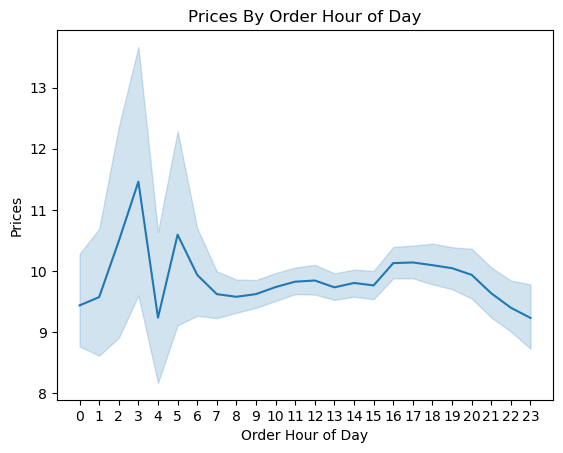

In [36]:
#Creating Lineplot with big sample
line = sns.lineplot(data = df2, x = 'order_hour_of_day',y = 'prices')

#Creating Labels
plt.title('Prices By Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Prices')


#Set x-ticks to show each hour
plt.xticks(range(0, 24))

We can see the highest peaks at 3am and 5am, and the lowest peaks at 4am and 23pm. apart from the very big peaks at 3am and 5am the rest of the prices throughout the day are all between 9 .5 and 10.5 with some discrepency because of error bands as there are some products that have a very high price or respectively a very low price.

## Export Lineplot

In [39]:
line.figure.savefig(os.path.join(path2, 'line_prices_by_order_hour_of_day.png'))

# 06 Line Plot 2

In [41]:
#Creating Dataframes from sample data for the Age and Number of dependants columns
df3 = big[['age', 'number_of_dependants']]

In [42]:
#checking output
df3

,age,number_of_dependants
1,81,1
3,40,3
4,40,3
5,51,2
7,65,0
...,...,...
32404854,47,1
32404855,25,0
32404856,57,1
32404857,57,1


Text(0, 0.5, 'Number of Dependants')

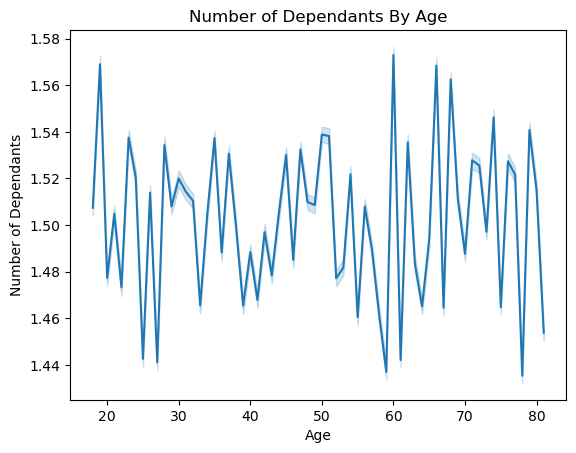

In [43]:
#create lineplot with big data age and number of dependants columns
line2 = sns.lineplot(data = df3, x = 'age',y = 'number_of_dependants')

#Creating Labels
plt.title('Number of Dependants By Age')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')

There is no correlation between age and number of dependants as we can see their is no trend it is very scattered and random distribution throughout the line plot.

## Export Line plot 2

In [46]:
line2.figure.savefig(os.path.join(path2, 'line_age_by_number_of_dependants.png'))

# 07 Scatterplpot

In [48]:
#creating dataframe from big sample age and income columns
df4 = big[['age', 'income']]

In [49]:
#output check
df4

,age,income
1,81,-44
3,40,76
4,40,76
5,51,-59
7,65,56
...,...,...
32404854,47,31
32404855,25,-80
32404856,57,41
32404857,57,41


Text(0, 0.5, 'Income')

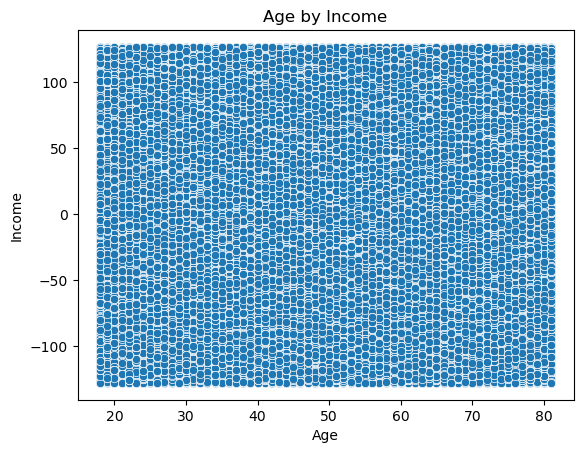

In [50]:
#creating lineplot for age by income
scatter = sns.scatterplot(x = 'age', y = 'income',data = df4)

#creating labels
plt.title('Age by Income')
plt.xlabel('Age')
plt.ylabel('Income')

It is completely random it has completely filled the table with dots this totally random distribution shows no correlation between the two variables age and income

## Export Scatterplot

In [53]:
scatter.figure.savefig(os.path.join(path2, 'scatterplot_age_by_income'))